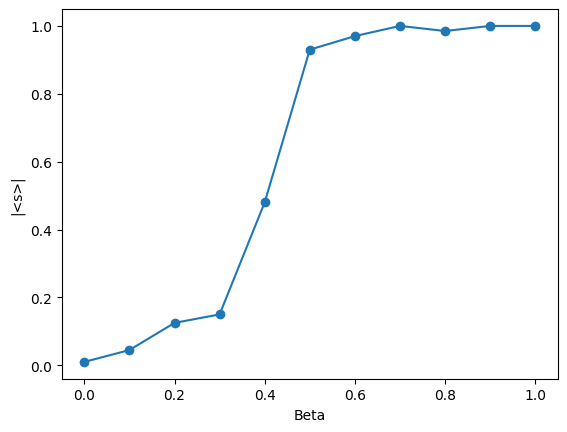

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 20
N = L*L
beta_values = np.linspace(0, 1, 11)

XNN = 1 # x 방향 이웃과의 거리
YNN = L # y 방향 이웃과의 거리

# 정사각 격자를 초기화하는 함수
def initialize_lattice(N):
  return np.random.choice([-1, 1], size=N)

# Wolff 알고리즘울 수행하는 함수
def wolff_step(s, padd):
  i = np.random.randint(N)
  stack = [i]
  oldspin = s[i]
  newspin = -s[i]
  s[i] = newspin

  while stack:
    current = stack.pop()

    for neighbor in [XNN, -XNN, YNN, -YNN]:
      nn = (current+neighbor)%N
      if s[nn] == oldspin and np.random.rand() < padd:
        stack.append(nn)
        s[nn] = newspin

# 격자의 평균 자화율을 계산하는 함수
def calculate_s(s):
  return np.abs(np.mean(s))

average_s = []

for beta in beta_values:
  s = initialize_lattice(N) # 격자 초기화
  padd = 1-np.exp(-2*beta)  # Wolff 알고리즘의 확률 계수

  for _ in range(1000):
    wolff_step(s, padd) # Wolff 알고리즘 1000번 반복

  final_s = calculate_s(s)  # 최종 자화율 계산
  average_s.append(final_s) # 결과를 리스트에 추가

# 결과를 그래프로 표시
plt.plot(beta_values, average_s, marker='o')
plt.xlabel('Beta')
plt.ylabel('|<s>|')
plt.show()